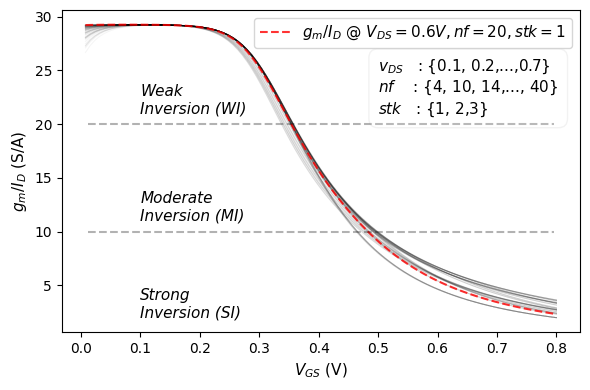

In [53]:
from typing import Any
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


plt.figure(figsize=(6,4))

file1 = pd.read_csv("gm_id_curve_stack1.csv")
file2 = pd.read_csv("gm_id_curve_stack2.csv")
file3 = pd.read_csv("gm_id_curve_stack3.csv")

vgs  = file1.to_numpy()[:,0]
np_1 = file1.to_numpy()[:,1::2]
np_2 = file2.to_numpy()[:,1::2]
np_3 = file3.to_numpy()[:,1::2]

# Plot background lines with low alpha to keep them less prominent
x = 1
for i in range(len(np_1[0])):
    plt.plot(vgs[x:], np_1[x:, i], '-', linewidth=0.8, color="black",   alpha=0.04)
    plt.plot(vgs[x:], np_2[x:, i], '-', linewidth=0.8, color="black",  alpha=0.04)
    plt.plot(vgs[x:], np_3[x:, i], '-', linewidth=0.8, color="black", alpha=0.04)

plt.plot(vgs[x:], np_1[x:, 15], '--', linewidth=1.5, color="red", alpha=0.8, label="$g_m/I_D\ @\ V_{DS}=0.6V, nf=20, stk=1 $")

# Improved text annotations with bounding boxes
text = ("$v_{DS}$   : {0.1, 0.2,...,0.7}\n"
        "$nf$    : {4, 10, 14,..., 40}\n"
        "$stk$   : {1, 2,3}")
plt.text(0.5, 21, text, fontsize=11, color='black',
         bbox=dict(facecolor='white', edgecolor='gray', alpha=0.1, boxstyle='round, pad=0.6'))

plt.text(0.1, 21, "Weak\nInversion (WI)",       fontsize=11, fontstyle='italic', color="black")
plt.text(0.1, 11, "Moderate\nInversion (MI)",   fontsize=11, fontstyle='italic', color="black")
plt.text(0.1, 2,  "Strong\nInversion (SI)",     fontsize=11, fontstyle='italic', color="black")



# Horizontal lines to indicate key regions
plt.axhline(y=20, color='k', alpha=0.3, linestyle='--', xmin=0.05, xmax=0.95)
plt.axhline(y=10, color='k', alpha=0.3, linestyle='--', xmin=0.05, xmax=0.95)

# Axis labels with larger fonts
plt.xlabel("$V_{GS}$ (V)", fontsize=11) 
plt.ylabel("$g_m / I_D$ (S/A)", fontsize=11)

# Adjust ticks and grid
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.legend(loc='upper right', fontsize=11)
# Save the figure
plt.tight_layout()
plt.savefig("gm_id_curve_2.svg", format="svg")
plt.show()

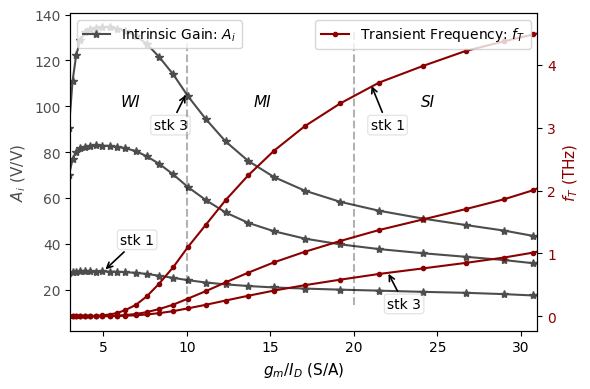

In [123]:
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, interp1d
from scipy.misc import derivative
from LUT.fetch_ import *
from tools.log_file import *
from sklearn.linear_model import LinearRegression
import time

VGS = np.linspace(0, 0.8, 41)
VDS = np.linspace(0, 0.8, 41)
VSB = np.array([0])
LEN = np.array([14e-9])
FIN = np.array([2, 6, 10, 20, 40])



tb = fetch_data_1()  # tb is for table

gm  = np.array([tb.lookup("gm", 1, 20, "n", vds_val=0.6), tb.lookup("gm", 2, 20, "n", vds_val=0.6), tb.lookup("gm", 3, 20, "n", vds_val=0.6)])
id  = np.array([tb.lookup("id", 1, 20, "n", vds_val=0.6), tb.lookup("id", 2, 20, "n", vds_val=0.6), tb.lookup("id", 3, 20, "n", vds_val=0.6)])
cgg = np.array([tb.lookup("cgg", 1, 20, "n", vds_val=0.6),tb.lookup("cgg", 2, 20, "n", vds_val=0.6),tb.lookup("cgg", 3, 20, "n", vds_val=0.6)])
gds = np.array([tb.lookup("gds", 1, 20, "n", vds_val=0.6),tb.lookup("gds", 2, 20, "n", vds_val=0.6),tb.lookup("gds", 3, 20, "n", vds_val=0.6)])
 

te = gm/id
ft = (gm/(2*np.pi*cgg))*10e-12 # in GHz
ai = gm/gds
 
 
 
 
 
fig, ax1 = plt.subplots(figsize=(6, 4))  # Set figure size for better layout

# First plot (red line with markers)
ax1.plot(te[0, ::-1], ai.T, '*-', color="#4D4D4D")  # Label for the legend
ax1.set_xlabel('$g_m/I_D$ (S/A)', fontsize=11)  # Add x-axis label
ax1.set_ylabel('$A_i$ (V/V)', fontsize=11, color='#4D4D4D')  # Add y-axis label with units and color
ax1.tick_params(axis='y', labelcolor='#4D4D4D')  # Color ticks to match line color
# ax1.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid with dashed lines

# Second plot (black square markers)
ax2 = ax1.twinx()  # Create a second y-axis
ax2.plot(te[0, ::-1], ft.T, '.-', color="#8B0000")  # Label for the legend
ax2.set_ylabel('$f_T$ (THz)', fontsize=11, color='#8B0000')  # Add y-axis label with units and color
ax2.tick_params(axis='y', labelcolor='#8B0000')  # Color ticks to match line color

# Set the x-axis limit as specified
plt.xlim([3, 31])

# Set font size for ticks
ax1.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)

# Add legends
ax1.legend(["Intrinsic Gain: $A_i$"], loc='upper left', fontsize=10)  # Legend for the FT data
ax2.legend(["Transient Frequency: $f_T$"], loc='upper right', fontsize=10)  # Legend for the AI data


ax1.text(6, 100, "WI",       fontsize=11, fontstyle='italic', color="black")
ax1.text(14, 100, "MI",   fontsize=11, fontstyle='italic', color="black")
ax1.text(24, 100, "SI",     fontsize=11, fontstyle='italic', color="black")


ax1.annotate('stk 1', xy=(21, 110), xytext=(21, 90), arrowprops=dict(arrowstyle='->', color='black', lw=1.2),fontsize=10,
             bbox=dict(boxstyle='round,pad=0.2', alpha=0.2, edgecolor='gray', facecolor='white'))

ax1.annotate('stk 3', xy=(22, 28), xytext=(22, 12), arrowprops=dict(arrowstyle='->', color='black', lw=1.2),fontsize=10,
             bbox=dict(boxstyle='round,pad=0.2', alpha=0.2, edgecolor='gray', facecolor='white'))


ax1.annotate('stk 3', xy=(10, 106), xytext=(8, 90), arrowprops=dict(arrowstyle='->', color='black', lw=1.2),fontsize=10,
             bbox=dict(boxstyle='round,pad=0.2', alpha=0.2, edgecolor='gray', facecolor='white'))

ax1.annotate('stk 1', xy=(5, 28), xytext=(6, 40), arrowprops=dict(arrowstyle='->', color='black', lw=1.2),fontsize=10,
             bbox=dict(boxstyle='round,pad=0.2', alpha=0.2, edgecolor='gray', facecolor='white'))


# Horizontal lines to indicate key regions
ax1.axvline(x=20, color='k', alpha=0.3, linestyle='--', ymin=0.08, ymax=0.95)
ax1.axvline(x=10, color='k', alpha=0.3, linestyle='--', ymin=0.08, ymax=0.95)
# Adjust the layout for better appearance
plt.tight_layout()
plt.savefig("ft_and_ai_fig.svg", format="svg")
plt.show()   # Show the plot




(3, 41) (41, 3) (41, 3)
Dimensions of x and y do not match. Please check your data.
